# Titanic Disaster Predictions

We predict the outcome of the disaster for each Passenger ID ( Survived =1 ) 

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import random
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

## Data Dictionary

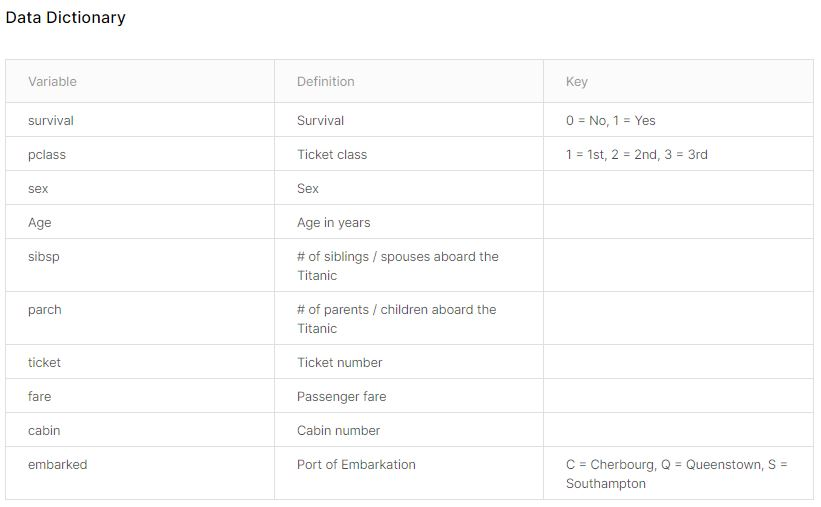

In [2]:
# Data Dictionary
from IPython.display import Image
Image(filename='C:/Users/spasula/Desktop/ML Training/Titanic Disaster/1.Data Collection/Data Dictionary.JPG')

## Variable Notes

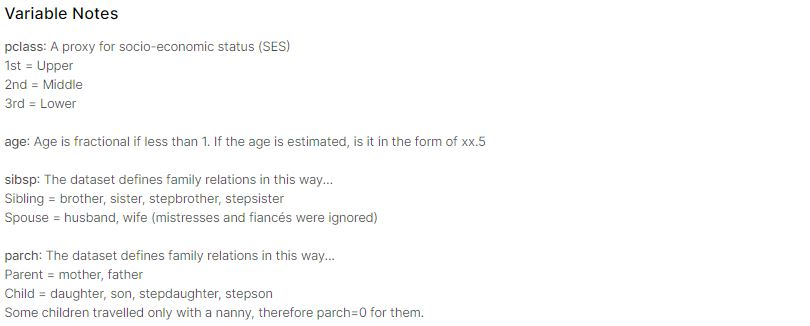

In [3]:
# Variable Notes
Image(filename='C:/Users/spasula/Desktop/ML Training/Titanic Disaster/1.Data Collection/Variable Notes.JPG')

# Exploratory Data Analysis

In [4]:
#Importing the Data
train_data = pd.read_csv("C:/Users/spasula/Desktop/ML Training/Titanic Disaster/1.Data Collection/train.csv")

In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Profile Report

In [7]:
# Get the profile report
from pandas_profiling import ProfileReport
profile = ProfileReport(train_data)
profile.to_file(outputfile='C:/Users/spasula/Desktop/ML Training/Titanic Disaster/3.Analysis/output.html')
profile

C:\Users\spasula\AppData\Local\Continuum\anaconda3\envs\pstenv\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.7 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Pair Plot

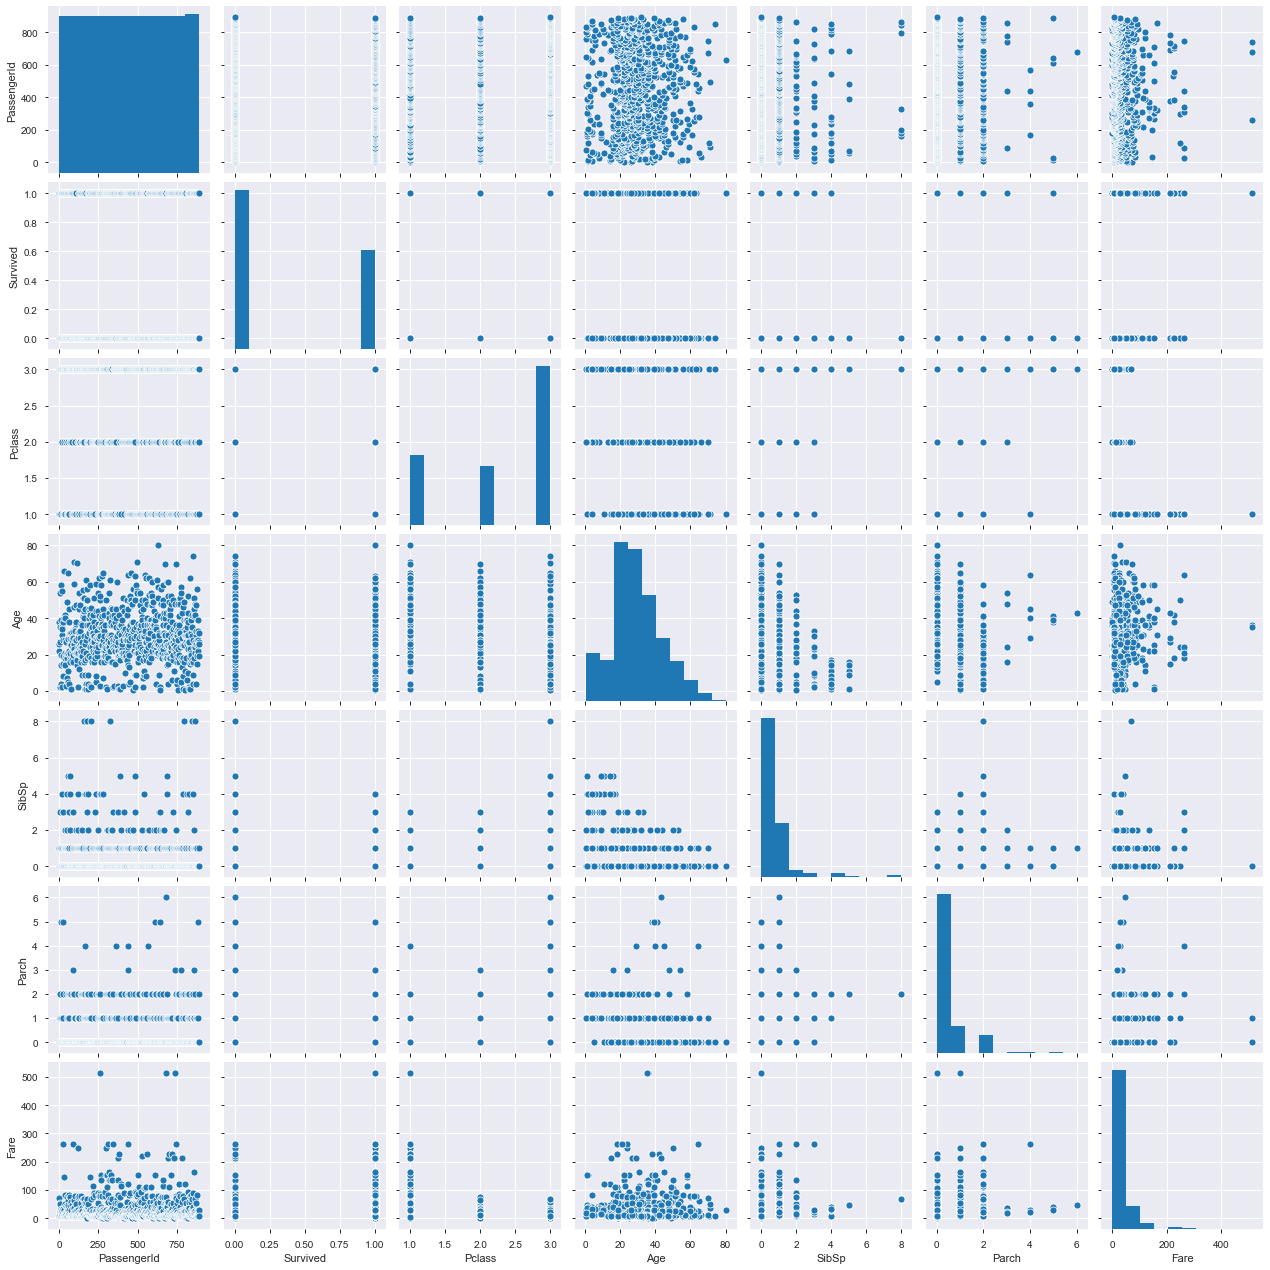

In [10]:
%matplotlib inline
sns.pairplot(train_data)
plt.show()

## Data Pre Processing

In [11]:
#Importing the Data
train_data = pd.read_csv("C:/Users/spasula/Desktop/ML Training/Titanic Disaster/1.Data Collection/train.csv")

In [12]:
# Dropping Cabin - Missing Values
train_data.drop(['Cabin'],axis=1,inplace=True)

# Dropping Fare - High Correlation with Pclass & Ambiguous Variable
train_data.drop(['Fare'],axis=1,inplace=True)

# Dropping Ticket - No Significance
train_data.drop(['Ticket'],axis=1,inplace=True)

In [13]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked'],
      dtype='object')

## Missing Value Imputations

In [14]:
# Missing Value Imputations

# Imputing Age with Median
Age_Imp = train_data[['Pclass','Sex','Age']].dropna().groupby(by=['Pclass','Sex']).median().reset_index()
Age_Imp.rename(columns={'Age':'Age_Imp'},inplace=True)
train_data_v1 = pd.merge(train_data,Age_Imp,on=['Pclass','Sex'])
train_data_v1['Age'] = train_data_v1['Age'].fillna(train_data_v1['Age_Imp'])
train_data_v1.drop(['Age_Imp'],axis=1,inplace=True)

# Imputing Age with Mode
train_data_v1['Embarked'] = train_data_v1['Embarked'].fillna('S')

In [15]:
train_data_v1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

## Feature Engineering

In [ ]:
# Name Analysis
# Extract Mr / Mrs. / Master / Miss / Occupation info from Name
train_data_v1['Title'] = train_data_v1['Name'].str.split(',',n = 1, expand = True)[1].str.split(".",n = 1, expand = True)[0].str.strip()
train_data_v1.drop(['Name'],axis=1,inplace=True)

In [17]:
# Calculating Event Rates for Categories
Categ_List = ['Pclass','Sex','SibSp','Parch','Embarked','Title']
for var in Categ_List:
    Pvt = pd.DataFrame(pd.pivot_table(train_data_v1,values=['Survived'],index=var,aggfunc=['count','sum'],margins=True))
    Pvt['%Survived'] = Pvt['sum']['Survived']/Pvt['count']['Survived']
    print(Pvt)

          count      sum %Survived
       Survived Survived          
Pclass                            
1           216      136  0.629630
2           184       87  0.472826
3           491      119  0.242363
All         891      342  0.383838
          count      sum %Survived
       Survived Survived          
Sex                               
female      314      233  0.742038
male        577      109  0.188908
All         891      342  0.383838
         count      sum %Survived
      Survived Survived          
SibSp                            
0          608      210  0.345395
1          209      112  0.535885
2           28       13  0.464286
3           16        4  0.250000
4           18        3  0.166667
5            5        0  0.000000
8            7        0  0.000000
All        891      342  0.383838
         count      sum %Survived
      Survived Survived          
Parch                            
0          678      233  0.343658
1          118       65  0.550847
2

In [18]:
# Feature Engineering

# Combine Titles - Based on Event Rates
train_data_v1['Title'] = train_data_v1['Title'].replace(['Capt','Col','Don','Dr','Jonkheer',
                                                         'Lady','Major','Rev','Sir','the Countess'],'Executive')
train_data_v1['Title'] = train_data_v1['Title'].replace('Mlle','Miss')
train_data_v1['Title'] = train_data_v1['Title'].replace('Mme','Mrs')
train_data_v1['Title'] = train_data_v1['Title'].replace('Ms','Miss')

In [19]:
# Combine Sibsp & Parch - Based on Event Rates
train_data_v1.loc[(train_data_v1['SibSp'] + train_data['Parch']) == 0,'Family'] = 'Alone'
train_data_v1.loc[(((train_data_v1['SibSp'] + train_data['Parch']) > 0) & ((train_data_v1['SibSp'] + train_data['Parch']) <=4)),'Family'] = 'Small Family'
train_data_v1.loc[(train_data_v1['SibSp'] + train_data['Parch']) > 4,'Family'] = 'Big Family'
train_data_v1.drop(['SibSp','Parch'],axis=1,inplace=True)

In [20]:
# Calculating Event Rates for Categories - Grouped
Categ_List = ['Pclass','Sex','Family','Embarked','Title']
for var in Categ_List:
    Pvt = pd.DataFrame(pd.pivot_table(train_data_v1,values=['Survived'],index=var,aggfunc=['count','sum'],margins=True))
    Pvt['%Survived'] = Pvt['sum']['Survived']/Pvt['count']['Survived']
    print(Pvt)

          count      sum %Survived
       Survived Survived          
Pclass                            
1           216      136  0.629630
2           184       87  0.472826
3           491      119  0.242363
All         891      342  0.383838
          count      sum %Survived
       Survived Survived          
Sex                               
female      314      233  0.742038
male        577      109  0.188908
All         891      342  0.383838
                count      sum %Survived
             Survived Survived          
Family                                  
Alone             456      161  0.353070
Big Family         25        5  0.200000
Small Family      410      176  0.429268
All               891      342  0.383838
            count      sum %Survived
         Survived Survived          
Embarked                            
C             168       93  0.553571
Q              77       30  0.389610
S             646      219  0.339009
All           891      342  0.383838

## WOE for Categorical

In [21]:
# Calculate Weight of Evidences for Categories

#IV
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature],  # Good (think: Survived == 1)
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature]]) # Bad (think: Survived == 0)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()

    data = data.drop(['Variable', 'All', 'Good', 'Bad', 'Share', 'Bad Rate', 'Distribution Good', 'Distribution Bad', 'IV'], axis=1)
    return iv, data

#WOE
def woe_imp(df1, feature, target, woe_feature, pr=False):
    iv, df2 = calc_iv(df1, feature, target)
    df1 = df1.merge(df2, left_on= feature, right_on='Value', how='left')
    df1 = df1.rename(columns = {"WoE": woe_feature,"Value":(str("Categ_") + feature)})
    return df1

In [22]:
# Imputing WOE for the Categorical Variables - Train Data
WOE_Out_Df = pd.DataFrame()
Categ_List = ['Pclass','Family','Embarked','Title']
for i in Categ_List:
    Var_Str = "WOE_" + str(i)
    train_data_v1 = woe_imp(train_data_v1, i, 'Survived', Var_Str)
    WOE_Imp_Df = train_data_v1[[Var_Str,(str("Categ_") + i)]].drop_duplicates(inplace=False).T.drop_duplicates().T
    WOE_Out_Df = pd.concat([WOE_Out_Df,WOE_Imp_Df])
    train_data_v1.drop([i,(str("Categ_") + i)],axis=1,inplace=True)

C:\Users\spasula\AppData\Local\Continuum\anaconda3\envs\pstenv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [23]:
# Impute with WOE
train_data_v1.isnull().sum()

PassengerId     0
Survived        0
Sex             0
Age             0
WOE_Pclass      0
WOE_Family      0
WOE_Embarked    0
WOE_Title       0
dtype: int64

In [24]:
# Map Age
train_data_v1['Sex'] = train_data_v1['Sex'].map({'female':1,'male':0})

In [25]:
train_data_v1.head()

,PassengerId,Survived,Sex,Age,WOE_Pclass,WOE_Family,WOE_Embarked,WOE_Title
0,1,0,0,22.0,-0.666483,0.188451,-0.194425,-1.209905
1,5,0,0,35.0,-0.666483,-0.132283,-0.194425,-1.209905
2,6,0,0,25.0,-0.666483,-0.132283,0.024337,-1.209905
3,8,0,0,2.0,-0.666483,0.188451,-0.194425,0.775569
4,13,0,0,20.0,-0.666483,-0.132283,-0.194425,-1.209905


# Modeling

## Test & Train Split

In [26]:
# Variable Reduction - RFE Method
from sklearn.model_selection import train_test_split
X = train_data_v1.iloc[:,2:]
y = train_data_v1.iloc[:,1:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
# from sklearn.feature_selection import RFE
# log_model = LogisticRegression()
# rfe = RFE(log_model)
# rfe = rfe.fit(X,y)
# print(rfe.support_)
# print(rfe.ranking_)

## Training - Logistic Reg

In [28]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_result = log_model.fit(X_train,y_train)

C:\Users\spasula\AppData\Local\Continuum\anaconda3\envs\pstenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Test - Prediction

In [29]:
import sklearn.metrics as mt
y_hat = log_result.predict(X_test)
print(mt.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       161
           1       0.79      0.76      0.77       107

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [30]:
mt.confusion_matrix(y_test,y_hat)

array([[139,  22],
       [ 26,  81]], dtype=int64)

In [31]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = mt.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [32]:
# threshold = Find_Optimal_Cutoff(y_test, y_hat)
# print(threshold)

# Scoring the Model - OOT Data

In [33]:
#Importing the Data
test_data = pd.read_csv("C:/Users/spasula/Desktop/ML Training/Titanic Disaster/1.Data Collection/test.csv")

In [34]:
# Dropping Cabin - Missing Values
test_data.drop(['Cabin'],axis=1,inplace=True)

# Dropping Fare - High Correlation with Pclass & Ambiguous Variable
test_data.drop(['Fare'],axis=1,inplace=True)

# Dropping Ticket - No Significance
test_data.drop(['Ticket'],axis=1,inplace=True)

In [35]:
# Missing Value Imputations

# Imputing Age with Median
Age_Imp_2 = test_data[['Pclass','Sex','Age']].dropna().groupby(by=['Pclass','Sex']).median().reset_index()
Age_Imp_2.rename(columns={'Age':'Age_Imp'},inplace=True)
test_data_v1 = pd.merge(test_data,Age_Imp_2,on=['Pclass','Sex'],how='left')
test_data_v1['Age'] = test_data_v1['Age'].fillna(test_data_v1['Age_Imp'])
test_data_v1.drop(['Age_Imp'],axis=1,inplace=True)

# Imputing Age with Mode
test_data_v1['Embarked'] = test_data_v1['Embarked'].fillna('S')

In [36]:
# Name Analysis
# Extract Mr / Mrs. / Master / Miss / Occupation info from Name
test_data_v1['Title'] = test_data_v1['Name'].str.split(',',n = 1, expand = True)[1].str.split(".",n = 1, expand = True)[0].str.strip()
test_data_v1.drop(['Name'],axis=1,inplace=True)

In [37]:
# Feature Engineering

# Combine Titles - Based on Event Rates
test_data_v1['Title'] = test_data_v1['Title'].replace(['Capt','Col','Don','Dona','Dr','Jonkheer',
                                                         'Lady','Major','Rev','Sir','the Countess'],'Executive')
test_data_v1['Title'] = test_data_v1['Title'].replace('Mlle','Miss')
test_data_v1['Title'] = test_data_v1['Title'].replace('Mme','Mrs')
test_data_v1['Title'] = test_data_v1['Title'].replace('Ms','Miss')

# Combine Sibsp & Parch - Based on Event Rates
test_data_v1.loc[(test_data_v1['SibSp'] + test_data['Parch']) == 0,'Family'] = 'Alone'
test_data_v1.loc[(((test_data_v1['SibSp'] + test_data['Parch']) > 0) & ((test_data_v1['SibSp'] + test_data['Parch']) <=4)),'Family'] = 'Small Family'
test_data_v1.loc[(test_data_v1['SibSp'] + test_data['Parch']) > 4,'Family'] = 'Big Family'
test_data_v1.drop(['SibSp','Parch'],axis=1,inplace=True)


In [38]:
# Imputing WOE for the Categorical Variables - Test Data
Categ_List = ['Pclass','Family','Embarked','Title']
for i in Categ_List:
    Var1 = str("Categ_"+i)
    Var2 = str("WOE_"+i)
    Mrgdf1 = WOE_Out_Df[[Var1,Var2]].drop_duplicates().dropna()
    test_data_v1 = pd.merge(test_data_v1,Mrgdf1,left_on = i,right_on=Var1,how='left')
    test_data_v1.drop([i,Var1],axis=1,inplace=True)

In [39]:
test_data_v1['Sex'] = test_data_v1['Sex'].map({'female':1,'male':0})

In [40]:
test_data_v1.sort_values(by=['PassengerId'],inplace=True)

In [41]:
test_data_y = pd.DataFrame(log_result.predict(test_data_v1.iloc[:,1:]))

In [42]:
Out = pd.merge(test_data_y,test_data_v1,left_index = True,right_index=True,how='left')

In [43]:
Out = Out.rename(columns={0:'Survived'})

# Final Predictions

In [44]:
Out[['PassengerId','Survived']].to_csv("C:/Users/spasula/Desktop/ML Training/Titanic Disaster/4.Outputs/Base_Submission.csv",index=False)